# Bitcoin analysis and forecast based on historical trade data - 2019-02

### Readme

This is the second Bitcoin analysis and forecast made end of Februar 2019. The [last](https://github.com/bishoph/machine_learning/blob/master/prophet/Bitcoin.ipynb) one got me started with FB Prophet. Again, the outcome and prediction should not be taken too seriously. The analysis from last year showed an uptrend and a downtrend. Depending on the used data. While the full data showed an uptrend, the analysis based on one year of latest data showed a downtrend. Today we now that the price went down. Let's do another round with the slightly the same approach.

The used trade data is from 2010-07-17 till 2019-02-19 and we are using a mean "y" column across all sources.


#### Forecasts and graphs

* 1 year forecast based on all trade data
* 1 year forecast based on last year trade data

#### Results

* The full data forecast is again up and the range is from 6000 to 11000
* The forecast based on two years of the latest data shows again a downtrend within the range...go check yourself ;)

### Resources
#### Prophet
https://research.fb.com/prophet-forecasting-at-scale/
#### Bitcoin trade data CSV
https://data.bitcoinity.org/markets/price/all/USD?c=e&t=l

In [1]:
import warnings
import datetime
import copy
import pandas as pd
from fbprophet import Prophet

warnings.filterwarnings('ignore')

dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d %H:%M:%S %Z') for d in dates]

df = pd.read_csv('bitcoin_trade_data_combined_2019_Export.CSV', parse_dates=['ds'], date_parser=dateparse, usecols=['ds', 'y'])
df.head()

,ds,y
0,2010-07-17,0.049510
1,2010-07-18,0.077975
2,2010-07-19,0.086792
3,2010-07-20,0.077999
4,2010-07-21,0.070463


We make a copy and extract the datapoints from the last two years:

In [2]:
dc = copy.deepcopy(df)
df_oy = dc[-730:]
df_oy.head()

,ds,y
2410,2017-02-20,1058.112988
2411,2017-02-21,1099.002461
2412,2017-02-22,1120.073272
2413,2017-02-23,1144.596615
2414,2017-02-24,1180.601080


In [3]:
m = Prophet(daily_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3500,2020-02-15
3501,2020-02-16
3502,2020-02-17
3503,2020-02-18
3504,2020-02-19


In [4]:
forecast = m.predict(future)

In [5]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3500,2020-02-15,8539.651659,6182.903607,10922.044176
3501,2020-02-16,8576.257437,6190.494402,10946.846665
3502,2020-02-17,8625.525576,6285.717468,10787.119546
3503,2020-02-18,8670.569920,6045.429944,11045.386191
3504,2020-02-19,8721.812431,6448.245622,10939.210492


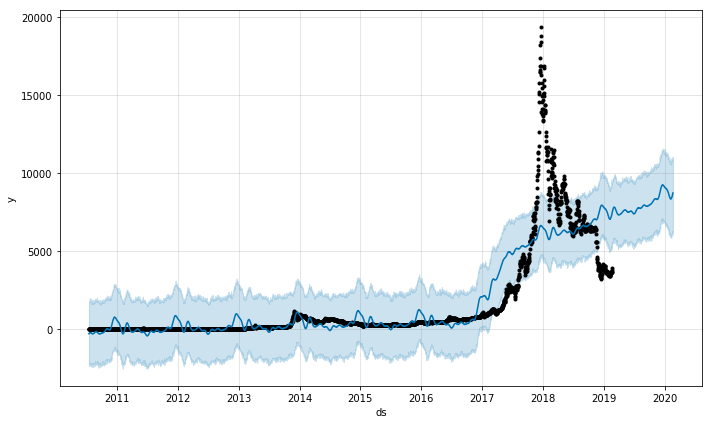

In [6]:
m.plot(forecast);

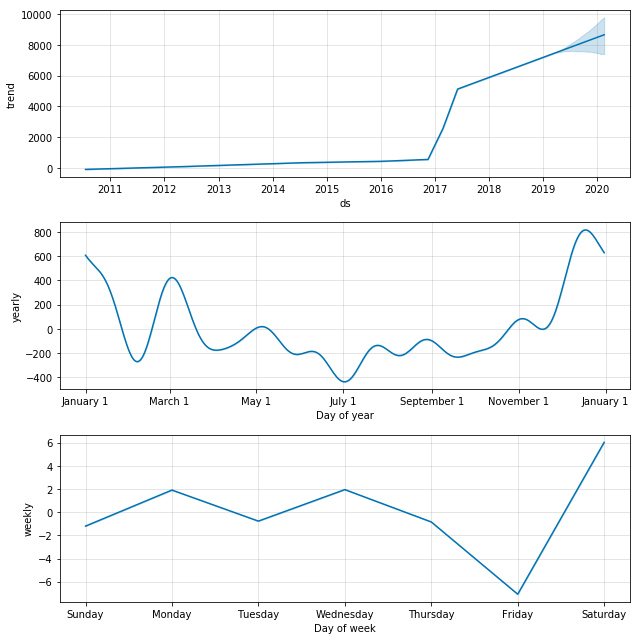

In [7]:
m.plot_components(forecast);

Now we want to make a forecast for next year based on two years of the latest data.

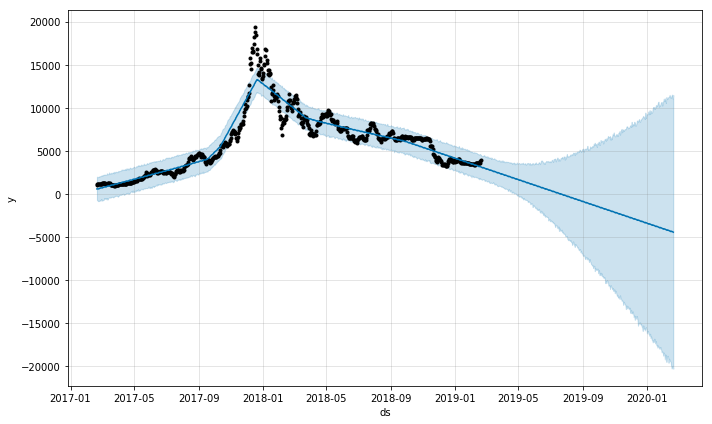

In [8]:
m_oy = Prophet(daily_seasonality=False, yearly_seasonality=False)
m_oy.fit(df_oy)
future_oy = m_oy.make_future_dataframe(periods=365)
forecast_oy = m_oy.predict(future_oy)
m_oy.plot(forecast_oy);

In [9]:
forecast_oy[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1090,2020-02-15,-4321.544913,-19954.282597,11257.966101
1091,2020-02-16,-4368.956173,-20267.306512,11464.970761
1092,2020-02-17,-4363.936182,-20085.475119,11535.025577
1093,2020-02-18,-4394.984722,-19957.753034,11054.672993
1094,2020-02-19,-4439.724053,-20287.860558,11478.777605
